# Phase 3 Project
- author: Jonathan Holt
- Flatiron Data Science
- 7/19/21 Cohort

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_rows', 1000) #change the amount of rows displayed
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Fixing column names

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

# Inital Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

## 2/18/22

In [6]:
#churned_df_base = df[df["churn"] == 1]
#stayed_df_base = df[df["churn"] == 0]

In [7]:
#churned_df_base['account_length'].value_counts()

In [8]:
#stayed_df_base['customer_service_calls'].value_counts()

In [9]:
#churned_df_base[.value_counts()

In [10]:
#df.describe()

In [11]:
#df.isna().sum()

In [12]:
#df.churn.value_counts()

In [13]:
#df['number_vmail_messages'].value_counts()

# Cleaning and Preprocessing

In [14]:
#df.head()

In [15]:
test_df = df.copy()
test_df.head(2)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


## Changing False to 0 and True to 1

In [16]:
test_df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [17]:
test_df["churn"] = test_df["churn"].astype(int)

In [18]:
test_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [19]:
#test_df = test_df.drop(columns=['state', 'phone_number', 'international_plan', 'voice_mail_plan'], axis=1)
test_df = test_df.drop(columns=['state','phone_number', 'area_code'], axis=1)

In [20]:
test_df.head(1)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


## Slicing out object type Features

In [21]:
cont_features = [col for col in test_df.columns if test_df[col].dtype in [np.float64, np.int64]]

In [22]:
cont_features

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn']

In [23]:
feature_df = test_df.loc[:, cont_features]
#X_test_cat = X_test.loc[:, features_cat]
feature_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [24]:
#need_to_encode = test_df[['area_code', 'customer_service_calls']]
need_to_encode = test_df[['international_plan', 'voice_mail_plan', 'customer_service_calls', 'churn']]

In [25]:
#IMPORTANT!
#Added 2/16 4PM. 
#feature_df = feature_df.drop(need_to_encode, axis=1)
#feature_df = feature_df.drop(['area_code', 'customer_service_calls'], axis=1)
#feature_df = feature_df.drop(['customer_service_calls'], axis=1)
#feature_df

## One Hot Encoding

In [26]:
ohe = OneHotEncoder()
ohe.fit(need_to_encode)

ohe_1 = ohe.transform(need_to_encode).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(need_to_encode.columns))
ohe_df.head()

,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9,churn_0,churn_1
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Dropping one value for categoricals

In [27]:
#IMPORTANT
#Dropping a few of the redundant values.
ohe_df = ohe_df.drop(['international_plan_no', 'voice_mail_plan_no', 'churn_0'], axis=1)
ohe_df.head()

,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9,churn_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#cs_calls_1_2_3_df=ohe_df[['customer_service_calls_1', 'customer_service_calls_2',
#                          'customer_service_calls_3']]

In [29]:
#cs_calls_1_2_3 = ohe_df.apply(lambda x: x['customer_service_calls_1'] + x['customer_service_calls_2']
#                              + x['customer_service_calls_3'], axis=1)
#cs_calls_4_5_6 = ohe_df.apply(lambda x: x['customer_service_calls_4'] + x['customer_service_calls_5']
#                              + x['customer_service_calls_6'], axis=1)
#cs_calls_7_8_9 = ohe_df.apply(lambda x: x['customer_service_calls_7'] + x['customer_service_calls_8']
#                              + x['customer_service_calls_9'], axis=1)

#ohe_df['cs_calls_1_2_3'] = cs_calls_1_2_3
#ohe_df['cs_calls_4_5_6'] = cs_calls_4_5_6
#ohe_df['cs_calls_7_8_9'] = cs_calls_7_8_9
#ohe_df.head()

In [34]:
cs_calls_low = ohe_df.apply(lambda x: x['customer_service_calls_0']+ x['customer_service_calls_1'] + x['customer_service_calls_2']
                              + x['customer_service_calls_3'], axis=1)
cs_calls_high= ohe_df.apply(lambda x: x['customer_service_calls_4'] + x['customer_service_calls_5']
                              + x['customer_service_calls_6'] + x['customer_service_calls_7']
                            + x['customer_service_calls_8']+ x['customer_service_calls_9'], axis=1)

ohe_df['cs_calls_low'] = cs_calls_low
ohe_df['cs_calls_high'] = cs_calls_high

In [35]:
ohe_df = ohe_df.drop(['customer_service_calls_1','customer_service_calls_2','customer_service_calls_3',
                     'customer_service_calls_4','customer_service_calls_5','customer_service_calls_6',
                     'customer_service_calls_7','customer_service_calls_8','customer_service_calls_9']
                    , axis=1)
ohe_df.head()

,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,churn_1,cs_calls_low,cs_calls_high
0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Combining everything together

cleaned_df = pd.concat([pd.DataFrame(feature_df), ohe_df], axis=1)

In [37]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_length            3333 non-null   int64  
 1   number_vmail_messages     3333 non-null   int64  
 2   total_day_minutes         3333 non-null   float64
 3   total_day_calls           3333 non-null   int64  
 4   total_day_charge          3333 non-null   float64
 5   total_eve_minutes         3333 non-null   float64
 6   total_eve_calls           3333 non-null   int64  
 7   total_eve_charge          3333 non-null   float64
 8   total_night_minutes       3333 non-null   float64
 9   total_night_calls         3333 non-null   int64  
 10  total_night_charge        3333 non-null   float64
 11  total_intl_minutes        3333 non-null   float64
 12  total_intl_calls          3333 non-null   int64  
 13  total_intl_charge         3333 non-null   float64
 14  customer

In [38]:
#Dropping the categories that are now duplicates
cleaned_df = cleaned_df.drop(['churn', 'customer_service_calls'], axis=1)
cleaned_df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,churn_1,cs_calls_low,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0.0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0.0,1.0,0.0,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0.0,0.0,1.0,0.0,1.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,1.0,0.0,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
#X = cleaned_df.drop(['churn'], axis=1)
X = cleaned_df.drop(['churn_1'], axis=1)
#X = test_df[['area_code', 'international_plan', 'voice_mail_plan', 'customer_service_calls' ]]
#y = cleaned_df['churn']
y = cleaned_df['churn_1']

## Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=23)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 2486 to 512
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_length            2499 non-null   int64  
 1   number_vmail_messages     2499 non-null   int64  
 2   total_day_minutes         2499 non-null   float64
 3   total_day_calls           2499 non-null   int64  
 4   total_day_charge          2499 non-null   float64
 5   total_eve_minutes         2499 non-null   float64
 6   total_eve_calls           2499 non-null   int64  
 7   total_eve_charge          2499 non-null   float64
 8   total_night_minutes       2499 non-null   float64
 9   total_night_calls         2499 non-null   int64  
 10  total_night_charge        2499 non-null   float64
 11  total_intl_minutes        2499 non-null   float64
 12  total_intl_calls          2499 non-null   int64  
 13  total_intl_charge         2499 non-null   float64
 14  intern

# Decision Tree 1 (Baseline Decision Tree)

In [42]:
dtree_1 = DecisionTreeClassifier(random_state=23)

dtree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

In [43]:
dt1_y_pred = dtree_1.predict(X_test)

## Evaluating Decision Tree 1

In [120]:
# Calculate Classification Metrics

dt1_acc = accuracy_score(y_test, dt1_y_pred) * 100
print('DTree 1 Accuracy is :{0}'.format(dt1_acc))
dt1_prec = precision_score(y_test, dt1_y_pred) * 100
print('DTree 1 Precision is :{0}'.format(dt1_prec))
dt1_rcl = recall_score(y_test, dt1_y_pred) * 100
print('DTree 1 Recall is :{0}'.format(dt1_rcl))
dt1_f1 = f1_score(y_test, dt1_y_pred) * 100
print('DTree 1 F1 Score is :{0}'.format(dt1_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt1_y_pred)
dt1_roc_auc = auc(false_positive_rate, true_positive_rate)
print('DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))
print('DTree 1 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, dt1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

DTree 1 Accuracy is :92.32613908872902
DTree 1 Precision is :75.67567567567568
DTree 1 Recall is :69.42148760330579
DTree 1 F1 Score is :72.41379310344827
DTree 1 AUC is :0.83
DTree 1 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,686,27,713
1.0,37,84,121
All,723,111,834


In [121]:
#dt1_acc = precision_score(y_test, dt1_y_pred) * 100
#print('DTree 1 Precision is :{0}'.format(dt1_acc))

In [122]:
# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt1_y_pred)
#dt1_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('\n DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))

In [123]:
# Create and print a confusion matrix 
#print('\n DTree 1 Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, dt1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

## Analysis of Accuracy, AUC, and Confusion Matrix
- Analysis goes HERE
- AND HERE
- AND HERE!

In [47]:
#dt1_cv_score = cross_val_score(dtree_1, X_train, y_train, cv=3)
#mean_dt1_cv_score = np.mean(dt1_cv_score)

#print(f"DTree 1 Mean Cross Validation Score: {mean_dt1_cv_score :.2%}")

# GridSearchCV & Decision Tree 2

In [49]:
#2/22 added class weight parameter
dtree_2 = DecisionTreeClassifier(random_state=23, class_weight="balanced")

In [50]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [51]:
# Instantiate GridSearchCV
dt2_grid_search = GridSearchCV(dtree_2, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [52]:
# Mean training score
dt2_gs_training_score = np.mean(dt2_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt2_gs_testing_score = dt2_grid_search.score(X_test, y_test)

print(f"DTree 2 Mean Training Score: {dt2_gs_training_score :.2%}")
print(f"DTree 2 Mean Test Score: {dt2_gs_testing_score :.2%}")
print("DTree 2 Best Parameter Combination Found During Grid Search:")
dt2_grid_search.best_params_

DTree 2 Mean Training Score: 88.63%
DTree 2 Mean Test Score: 92.93%
DTree 2 Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

## Decision Tree 2

In [53]:
dtree_2 = DecisionTreeClassifier(criterion='entropy', 
                           max_depth=6,
                           min_samples_split=2,
                           min_samples_leaf=2,
                            random_state=23)

In [54]:
#dtree_2 = DecisionTreeClassifier(criterion='gini', 
#                           max_depth=6,
#                           min_samples_split=2,
#                           min_samples_leaf=1,
#                            random_state=23)

In [55]:
dtree_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=23)

In [56]:
dt2_y_pred = dtree_2.predict(X_test)

## Evaluating Decision Tree 2

In [135]:
# Calculate Classification Metrics

dt2_acc = accuracy_score(y_test, dt2_y_pred) * 100
print('DTree 2 Accuracy is :{0}'.format(dt2_acc))
dt2_prec = precision_score(y_test, dt2_y_pred) * 100
print('DTree 2 Precision is :{0}'.format(dt2_prec))
dt2_rcl = recall_score(y_test, dt2_y_pred) * 100
print('DTree 2 Recall is :{0}'.format(dt2_rcl))
dt2_f1 = f1_score(y_test, dt1_y_pred) * 100
print('DTree 2 F1 Score is :{0}'.format(dt2_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt2_y_pred)
dt2_roc_auc = auc(false_positive_rate, true_positive_rate)
print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))
print('DTree 2 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, dt2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

DTree 2 Accuracy is :94.24460431654677
DTree 2 Precision is :91.01123595505618
DTree 2 Recall is :66.94214876033058
DTree 2 F1 Score is :72.41379310344827
DTree 2 AUC is :0.83
DTree 2 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,705,8,713
1.0,40,81,121
All,745,89,834


In [124]:
# Calculate accuracy 
#dt2_acc = accuracy_score(y_test,dt2_y_pred) * 100
#print('DTree 2 Accuracy is :{0}'.format(dt2_acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt2_y_pred)
#dt2_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))

# Create and print a confusion matrix 
#print('DTree 2 Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, dt2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

## Analysis of Accuracy, AUC, and Confusion Matrix
- Analysis goes HERE
- AND HERE
- AND HERE!

## Plot?

# Random Forests 1

In [58]:
rf1_clf = RandomForestClassifier(random_state=23, class_weight="balanced")
mean_rf1_cv_score = np.mean(cross_val_score(rf1_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf1_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 94.12%


In [59]:
rf1_clf.fit(X_train, y_train)
rf1_y_pred = rf1_clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rf1_y_pred)
rf1_roc_auc = auc(false_positive_rate, true_positive_rate)
rf1_roc_auc
print(f"Random Forests 1 AUC Score: {rf1_roc_auc :.2%}")

Random Forests 1 AUC Score: 83.60%


## Evaluating Random Forests 1

In [129]:
# Calculate Classification Metrics

rf1_acc = accuracy_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))
rf1_prec = precision_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 Precision is :{0}'.format(rf1_prec))
rf1_rcl = recall_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 Recall is :{0}'.format(rf1_rcl))
rf1_f1 = f1_score(y_test, rf1_y_pred) * 100
print('Random Forests 1 F1 Score is :{0}'.format(rf1_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf1_y_pred)
rf1_roc_auc = auc(false_positive_rate, true_positive_rate)
print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))
print('Random Forests 1 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, rf1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Random Forests 1 Accuracy is :94.8441247002398
Random Forests 1 Precision is :95.34883720930233
Random Forests 1 Recall is :67.76859504132231
Random Forests 1 F1 Score is :79.22705314009661
Random Forests 1 AUC is :0.84
Random Forests 1 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,709,4,713
1.0,39,82,121
All,748,86,834


In [127]:
# Calculate accuracy 
#rf1_acc = accuracy_score(y_test,rf1_y_pred) * 100
#print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf1_y_pred)
#rf1_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))

# Create and print a confusion matrix 
#print('Random Forests Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, rf1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# GridSearch_CV & Random Forests 2

In [61]:
rf2_clf = RandomForestClassifier(random_state=23, class_weight="balanced")

In [62]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [63]:
rf2_grid_search = GridSearchCV(rf2_clf, rf_param_grid, cv=3)
rf2_grid_search.fit(X_train, y_train)

print(f"Random Forest 2 Training Accuracy: {rf2_grid_search.best_score_ :.2%}")
print("")
# Mean test score
rf2_gs_testing_score = rf2_grid_search.score(X_test, y_test)
print("")
print(f"Random Forest 2 Optimal Parameters: {rf2_grid_search.best_params_}")

Random Forest 2 Training Accuracy: 94.56%


Random Forest 2 Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [64]:
print(f"Random Forests 2 Mean Test Score: {rf2_gs_testing_score :.2%}")

Random Forests 2 Mean Test Score: 94.96%


In [65]:
rf2_clf = RandomForestClassifier(criterion= 'entropy',
                                max_depth= None,
                                min_samples_leaf= 3,
                                min_samples_split= 5,
                                n_estimators= 100)

mean_rf2_cv_score = np.mean(cross_val_score(rf2_clf, X_train, y_train, cv=3))

print(f"Random Forests 2 Mean Cross Validation Score: {mean_rf2_cv_score :.2%}")

Random Forests 2 Mean Cross Validation Score: 94.36%


In [66]:
#rf2_clf = RandomForestClassifier(criterion= 'gini',
#                                max_depth= None,
#                                min_samples_leaf= 3,
#                                min_samples_split= 5,
#                                n_estimators= 100)

#mean_rf2_cv_score = np.mean(cross_val_score(rf2_clf, X_train, y_train, cv=3))

#print(f"Random Forests 2 Mean Cross Validation Score: {mean_rf2_cv_score :.2%}")

In [67]:
rf2_clf.fit(X_train, y_train)
rf2_y_pred = rf2_clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rf2_y_pred)
rf2_roc_auc = auc(false_positive_rate, true_positive_rate)
rf2_roc_auc
print(f"Random Forests 2 AUC Score: {rf2_roc_auc :.2%}")

Random Forests 2 AUC Score: 83.95%


## Evaluating Random Forests 2

In [134]:
# Calculate Classification Metrics

rf2_acc = accuracy_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))
rf2_prec = precision_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 Precision is :{0}'.format(rf2_prec))
rf2_rcl = recall_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 Recall is :{0}'.format(rf2_rcl))
rf2_f1 = f1_score(y_test, rf2_y_pred) * 100
print('Random Forests 2 F1 Score is :{0}'.format(rf2_f1))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf2_y_pred)
rf2_roc_auc = auc(false_positive_rate, true_positive_rate)
print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))
print('Random Forests 2 Confusion Matrix')
print('----------------')
pd.crosstab(y_test, rf2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Random Forests 2 Accuracy is :94.8441247002398
Random Forests 2 Precision is :94.31818181818183
Random Forests 2 Recall is :68.59504132231406
Random Forests 2 F1 Score is :79.42583732057416
Random Forests 2 AUC is :0.84
Random Forests 2 Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,708,5,713
1.0,38,83,121
All,746,88,834


In [131]:
# Calculate accuracy 
#rf2_acc = accuracy_score(y_test,rf2_y_pred) * 100
#print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf2_y_pred)
#rf2_roc_auc = auc(false_positive_rate, true_positive_rate)
#print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))

# Create and print a confusion matrix 
#print('Random Forests 2 Confusion Matrix')
#print('----------------')
#pd.crosstab(y_test, rf2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [132]:
#dt2_score = dt2_grid_search.score(X_test, y_test)
#rf2_score = rf2_grid_search.score(X_test, y_test)

#print('Decision tree 2 grid search Score: ', dt2_score)
#print('Random forest 2 grid search Score: ', rf2_score)

# Comparisons

In [140]:
# Accuracy Score, AUC, & Confusion Matrix
print('DTree 1 Accuracy is :{0}'.format(dt1_acc))
print('DTree 2 Accuracy is :{0}'.format(dt2_acc))
print('Random Forests 1 Accuracy is :{0}'.format(rf1_acc))
print('Random Forests 2 Accuracy is :{0}'.format(rf2_acc))
print('----------------')
print('DTree 1 Precision is :{0}'.format(dt1_prec))
print('DTree 2 Precision is :{0}'.format(dt2_prec))
print('Random Forests 1 Precision is :{0}'.format(rf1_prec))
print('Random Forests 2 Precision is :{0}'.format(rf2_prec))
print('----------------')
print('DTree 1 Recall is :{0}'.format(dt1_rcl))
print('DTree 2 Recall is :{0}'.format(dt2_rcl))
print('Random Forests 1 Recall is :{0}'.format(rf1_rcl))
print('Random Forests 2 Recall is :{0}'.format(rf2_rcl))
print('----------------')
print('DTree 1 F1 Score is :{0}'.format(dt1_f1))
print('DTree 2 F1 Score is :{0}'.format(dt2_f1))
print('Random Forests 1 F1 Score is :{0}'.format(rf1_f1))
print('Random Forests 2 F1 Score is :{0}'.format(rf2_f1))
print('----------------')
print('DTree 1 AUC is :{0}'.format(round(dt1_roc_auc, 2)))
print('DTree 2 AUC is :{0}'.format(round(dt2_roc_auc, 2)))
print('Random Forests 1 AUC is :{0}'.format(round(rf1_roc_auc, 2)))
print('Random Forests 2 AUC is :{0}'.format(round(rf2_roc_auc, 2)))

DTree 1 Accuracy is :92.32613908872902
DTree 2 Accuracy is :94.24460431654677
Random Forests 1 Accuracy is :94.8441247002398
Random Forests 2 Accuracy is :94.8441247002398
----------------
DTree 1 Precision is :75.67567567567568
DTree 2 Precision is :91.01123595505618
Random Forests 1 Precision is :95.34883720930233
Random Forests 2 Precision is :94.31818181818183
----------------
DTree 1 Recall is :69.42148760330579
DTree 2 Recall is :66.94214876033058
Random Forests 1 Recall is :67.76859504132231
Random Forests 2 Recall is :68.59504132231406
----------------
DTree 1 F1 Score is :72.41379310344827
DTree 2 F1 Score is :72.41379310344827
Random Forests 1 F1 Score is :79.22705314009661
Random Forests 2 F1 Score is :79.42583732057416
----------------
DTree 1 AUC is :0.83
DTree 2 AUC is :0.83
Random Forests 1 AUC is :0.84
Random Forests 2 AUC is :0.84


In [141]:
print('\n DTree 1 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, dt1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('DTree 2 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, dt2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
print('Random Forests 1 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, rf1_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print('----------------')
print('----------------')
# Create and print a confusion matrix 
print('Random Forests 2 Confusion Matrix')
print('----------------')
print(pd.crosstab(y_test, rf2_y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


 DTree 1 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        686   27  713
1.0         37   84  121
All        723  111  834
----------------
----------------
DTree 2 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        705    8  713
1.0         40   81  121
All        745   89  834
----------------
----------------
Random Forests 1 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        709    4  713
1.0         39   82  121
All        748   86  834
----------------
----------------
Random Forests 2 Confusion Matrix
----------------
Predicted  0.0  1.0  All
True                    
0.0        708    5  713
1.0         38   83  121
All        746   88  834


In [72]:
#Comparing the Tuned Models
print(f"DTree 2 Mean Training Score: {dt2_gs_training_score :.2%}")
print(f"DTree 2 Mean Test Score: {dt2_gs_testing_score :.2%}")
print('--------------------------------')
print(f"Random Forest 2 Training Accuracy: {rf2_grid_search.best_score_ :.2%}")
print(f"Random Forest 2 Mean Test Score: {rf2_gs_testing_score :.2%}")

DTree 2 Mean Training Score: 88.63%
DTree 2 Mean Test Score: 92.93%
--------------------------------
Random Forest 2 Training Accuracy: 94.56%
Random Forest 2 Mean Test Score: 94.96%


In [73]:
#print(f"DTree 1 Mean Cross Validation Score: {mean_dt1_cv_score :.2%}")
#print(f"DTree 1 Mean Training Score: {dt1_gs_training_score :.2%}")
#print(f"DTree 1 Mean Test Score: {dt1_gs_testing_score :.2%}")
#print('Decision tree 1 grid search Score: ', dt1_score)
#print(f"DTree 1 AUC Score: {dt1_roc_auc :.2%}")
print('--------------------------------')
#print(f"RandomForest 1 Mean Cross Validation Score: {mean_rf1_cv_score :.2%}")
#print(f"Random Forest 1 Training Accuracy: {rf1_grid_search.best_score_ :.2%}")
#print('Random forest 1 grid search Score: ', rf1_score)
#print(f"Random Forests 1 AUC Score: {rf1_roc_auc :.2%}")
print('--------------------------------')
#print(f"DTree 2 Mean Cross Validation Score: {mean_dt2_cv_score :.2%}")
print('--------------------------------')
#print(f"Random Forests 2 Mean Cross Validation Score: {mean_rf2_cv_score :.2%}")


--------------------------------
--------------------------------
--------------------------------


### Analysis:
    - Explain what cross validation score means
    - explain what training score means
    - explain what test score means
    - explain what grid search score means
    - explain what ROC AUC score means

## Optimal Parameters

In [74]:
print("DTree 2 Best Parameter Combination Found During Grid Search:")
dt2_grid_search.best_params_

DTree 2 Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [75]:
print(f"Random Forest 1 Optimal Parameters: {rf2_grid_search.best_params_}")

Random Forest 1 Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


# Feature Importance

## Currently set to analyze Decision Tree 2

In [76]:
feature_names = list(X)
feature_names

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'international_plan_yes',
 'voice_mail_plan_yes',
 'customer_service_calls_0',
 'cs_calls_low',
 'cs_calls_high']

In [77]:
#rf2_importance = rf2_clf.feature_importances_
#rf2_importance

In [78]:
dt2_importance = dtree_2.feature_importances_
dt2_importance

array([0.01869465, 0.05548827, 0.09776969, 0.        , 0.20424789,
       0.04734154, 0.        , 0.08784211, 0.00637148, 0.02152906,
       0.02310517, 0.        , 0.07624473, 0.09188152, 0.13359051,
       0.        , 0.        , 0.        , 0.13589339])

In [79]:
#feature_importance_df = pd.DataFrame(rf2_importance, feature_names)
feature_importance_df = pd.DataFrame(dt2_importance, feature_names)
feature_importance_df

,0
account_length,0.018695
number_vmail_messages,0.055488
total_day_minutes,0.097770
total_day_calls,0.000000
total_day_charge,0.204248
total_eve_minutes,0.047342
total_eve_calls,0.000000
total_eve_charge,0.087842
total_night_minutes,0.006371
total_night_calls,0.021529


In [80]:
feature_importance_df= feature_importance_df.reset_index()

In [81]:
feature_importance_df.rename(columns={'index': 'Feature', 0: 'Importance'}, inplace=True)
feature_importance_df

,Feature,Importance
0,account_length,0.018695
1,number_vmail_messages,0.055488
2,total_day_minutes,0.097770
3,total_day_calls,0.000000
4,total_day_charge,0.204248
5,total_eve_minutes,0.047342
6,total_eve_calls,0.000000
7,total_eve_charge,0.087842
8,total_night_minutes,0.006371
9,total_night_calls,0.021529


###  SORTED

In [82]:
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
4,total_day_charge,0.204248
18,cs_calls_high,0.135893
14,international_plan_yes,0.133591
2,total_day_minutes,0.097770
13,total_intl_charge,0.091882
7,total_eve_charge,0.087842
12,total_intl_calls,0.076245
1,number_vmail_messages,0.055488
5,total_eve_minutes,0.047342
10,total_night_charge,0.023105


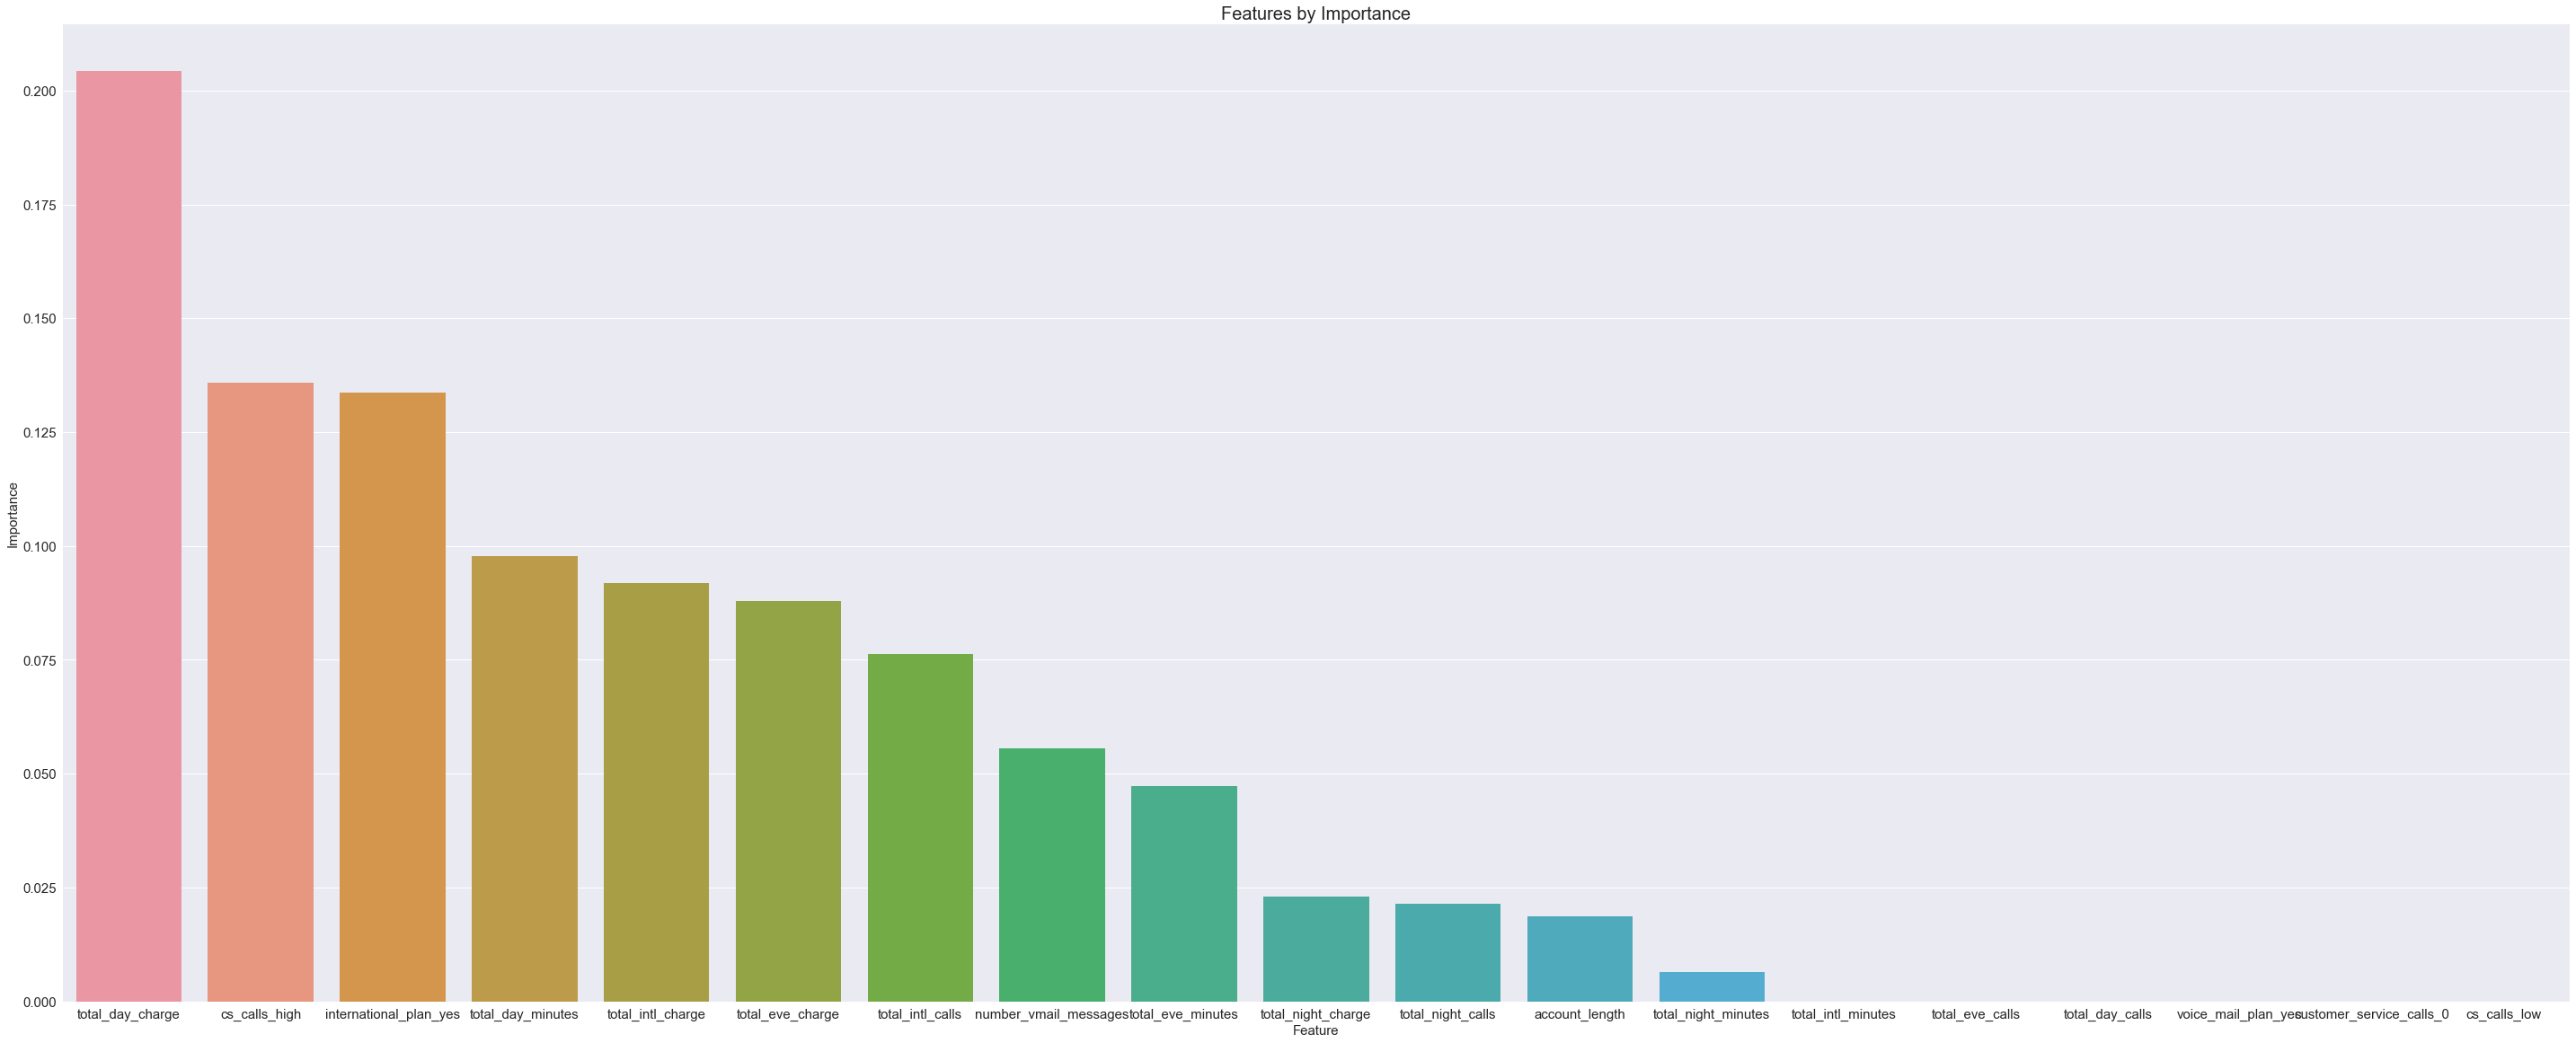

In [83]:
# plot feature importance
fig, ax = plt.subplots(figsize=(50,20))
p = sns.barplot(data=feature_importance_df, x='Feature', y='Importance' );

p.set_xlabel("Feature", fontsize = 15)

p.set_ylabel("Importance", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#p.yaxis.set_major_formatter(display_millions)
p.set_title("Features by Importance", fontsize = 20)
plt.figsize=(30,20) 
#plt.savefig('images/project_1_bar_3')

plt.show();

In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_length            3333 non-null   int64  
 1   number_vmail_messages     3333 non-null   int64  
 2   total_day_minutes         3333 non-null   float64
 3   total_day_calls           3333 non-null   int64  
 4   total_day_charge          3333 non-null   float64
 5   total_eve_minutes         3333 non-null   float64
 6   total_eve_calls           3333 non-null   int64  
 7   total_eve_charge          3333 non-null   float64
 8   total_night_minutes       3333 non-null   float64
 9   total_night_calls         3333 non-null   int64  
 10  total_night_charge        3333 non-null   float64
 11  total_intl_minutes        3333 non-null   float64
 12  total_intl_calls          3333 non-null   int64  
 13  total_intl_charge         3333 non-null   float64
 14  internat

## Analysis
- Figure out how to rank feature importance as this is the ultimate outcome for my business problem.
- VISUALIZE!!!!

# Analysis of Churned Customers

In [85]:
cleaned_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,churn_1,cs_calls_low,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0.0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0.0,1.0,0.0,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0.0,0.0,1.0,0.0,1.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,1.0,0.0,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,0.0,1.0,0.0,0.0,1.0,0.0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,0.0,0.0,0.0,0.0,1.0,0.0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,0.0,0.0,0.0,0.0,1.0,0.0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,1.0,0.0,0.0,0.0,1.0,0.0


In [86]:
churned_df = cleaned_df[cleaned_df["churn_1"] == 1]
churned_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,churn_1,cs_calls_low,cs_calls_high
10,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,0.0,0.0,0.0,1.0,0.0,1.0
15,161,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,0.0,0.0,0.0,1.0,0.0,1.0
21,77,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,0.0,0.0,0.0,1.0,0.0,1.0
33,12,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,0.0,0.0,0.0,1.0,1.0,0.0
41,135,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,1.0,1.0,1.0,1.0,1.0,0.0
48,119,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,0.0,0.0,0.0,1.0,0.0,1.0
54,87,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,0.0,0.0,0.0,1.0,0.0,1.0
57,121,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,0.0,1.0,0.0,1.0,1.0,0.0
69,150,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,0.0,0.0,0.0,1.0,0.0,1.0
76,82,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0.0,0.0,1.0,1.0,1.0,0.0


In [87]:
churned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 10 to 3323
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_length            483 non-null    int64  
 1   number_vmail_messages     483 non-null    int64  
 2   total_day_minutes         483 non-null    float64
 3   total_day_calls           483 non-null    int64  
 4   total_day_charge          483 non-null    float64
 5   total_eve_minutes         483 non-null    float64
 6   total_eve_calls           483 non-null    int64  
 7   total_eve_charge          483 non-null    float64
 8   total_night_minutes       483 non-null    float64
 9   total_night_calls         483 non-null    int64  
 10  total_night_charge        483 non-null    float64
 11  total_intl_minutes        483 non-null    float64
 12  total_intl_calls          483 non-null    int64  
 13  total_intl_charge         483 non-null    float64
 14  internat

In [88]:
churn_means = churned_df.mean()

In [89]:
stayed_df = cleaned_df[cleaned_df["churn_1"] == 0]
stayed_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,international_plan_yes,voice_mail_plan_yes,customer_service_calls_0,churn_1,cs_calls_low,cs_calls_high
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0.0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0.0,1.0,0.0,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0.0,0.0,1.0,0.0,1.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,1.0,0.0,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,0.0,1.0,0.0,0.0,1.0,0.0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,0.0,0.0,0.0,0.0,1.0,0.0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,0.0,0.0,0.0,0.0,1.0,0.0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,1.0,0.0,0.0,0.0,1.0,0.0


In [90]:
stayed_means = stayed_df.mean()

In [91]:
stayed_means = stayed_means.reset_index()

In [92]:
stayed_means = stayed_means.rename(columns={0: "Stayed"})

In [93]:
stayed_means

,index,Stayed
0,account_length,100.793684
1,number_vmail_messages,8.604561
2,total_day_minutes,175.175754
3,total_day_calls,100.283158
4,total_day_charge,29.780421
5,total_eve_minutes,199.043298
6,total_eve_calls,100.038596
7,total_eve_charge,16.918909
8,total_night_minutes,200.133193
9,total_night_calls,100.058246


In [94]:
churn_means = churn_means.reset_index()

In [95]:
churn_means = churn_means.rename(columns={0: "Left"})

In [96]:
new_df = pd.merge(stayed_means, churn_means, on= 'index')
new_df.head()

,index,Stayed,Left
0,account_length,100.793684,102.664596
1,number_vmail_messages,8.604561,5.115942
2,total_day_minutes,175.175754,206.914079
3,total_day_calls,100.283158,101.335404
4,total_day_charge,29.780421,35.175921


In [97]:
#new_df = new_df.drop(columns=['level_0_x', 'level_0_y'], axis=1)
#new_df.head()

In [98]:
new_df['Delta']= new_df.apply(lambda x: x['Left'] - x['Stayed'], axis=1)

In [99]:
new_df

,index,Stayed,Left,Delta
0,account_length,100.793684,102.664596,1.870912
1,number_vmail_messages,8.604561,5.115942,-3.488619
2,total_day_minutes,175.175754,206.914079,31.738324
3,total_day_calls,100.283158,101.335404,1.052246
4,total_day_charge,29.780421,35.175921,5.395500
5,total_eve_minutes,199.043298,212.410145,13.366847
6,total_eve_calls,100.038596,100.561077,0.522480
7,total_eve_charge,16.918909,18.054969,1.136060
8,total_night_minutes,200.133193,205.231677,5.098484
9,total_night_calls,100.058246,100.399586,0.341340


In [100]:
churned_df.sort_values('cs_calls_4_5_6', ascending=False)

KeyError: 'cs_calls_4_5_6'

In [ ]:
churned_df.info()

In [ ]:
churned_df_cat = churned_df[['customer_service_calls_0', 'cs_calls_1_2_3','cs_calls_4_5_6', 'cs_calls_7_8_9',
                  'voice_mail_plan_yes', 'international_plan_yes']]
churned_df_cat


In [ ]:
churned_df_cat.sum()

In [ ]:
stayed_df_cat = stayed_df[['customer_service_calls_0', 'cs_calls_1_2_3','cs_calls_4_5_6', 'cs_calls_7_8_9',
                  'voice_mail_plan_yes', 'international_plan_yes']]
stayed_df_cat

In [ ]:
stayed_df_cat.sum()

In [ ]:
churned_df.info()

In [ ]:
churned_df_num = churned_df[['account_length', "number_vmail_messages", "total_day_calls", "total_day_charge",
                             "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls",
                             "total_night_charge", "total_intl_calls", "total_intl_minutes", "total_intl_charge"
                            ]]

In [ ]:
stayed_df_num = stayed_df[['account_length', "number_vmail_messages", "total_day_calls", "total_day_charge",
                             "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls",
                             "total_night_charge", "total_intl_calls", "total_intl_minutes", "total_intl_charge"
                            ]]

In [ ]:
churned_df_num.mean()

In [ ]:
churned_df_num.describe()

In [ ]:
stayed_df_num.mean()

In [ ]:
churned_df_num['total_day_charge'].value_counts()

# Plot Decision Tree

## Analysis:
    - A plot of a Decision Tree might make fore a nice visual.

# Archive